In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc9c83b86a0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc9928b2400>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc9928b22b0>)

In [6]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [7]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [8]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [9]:
mnist.validation.images.shape

(5000, 784)

In [10]:
import numpy as np
from matplotlib import pyplot as plt

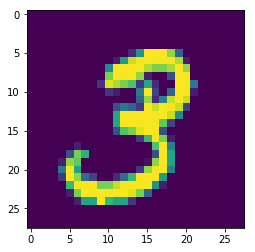

In [11]:
first_image = mnist.train.images[1]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [12]:
with tf.Session() as sess:
    print(tf.random_normal([784, 256]).eval())

[[-0.42605326  0.41691425  0.40616766 ... -1.0687368   1.1860759
   0.88777745]
 [ 0.2781248  -0.00670503 -0.42267987 ... -0.24903701  0.00915522
   0.28054118]
 [-0.56614953  1.978812   -0.9204145  ... -2.763564   -0.9386345
   1.214471  ]
 ...
 [-1.0011531   1.23929     0.6834084  ... -0.06162089 -0.48112285
   0.29584214]
 [ 1.5506861   0.9959833  -1.3651675  ... -0.5538638  -0.39247307
   0.41227376]
 [ 0.24004273  0.6277283   0.45410132 ... -0.27939785 -0.1297664
  -0.6579853 ]]


In [13]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [15]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [16]:
x = tf.placeholder("float", [None, n_input])
y =tf.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)

In [18]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

In [19]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [20]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [21]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y})
        total_cost += c
    print(total_cost)

29372.0804104805
4956.725360249198
2742.254461969249
2041.222275223088
1585.9161129148608
1331.7437140890972
1179.7428986678644
1083.1323138397122
939.9490220422756
782.4041189481771
811.0454867225129
722.3170820507282
673.9670962469241
428.8091978726615
479.6453776861656
434.02182796786207
433.9029003756307
355.0570236982762
291.8185143987491
307.1094660707151
268.6520669150055
230.93212688802694
264.5286790653538
171.99844752507693
194.9680392076209


In [23]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

9620